In [1]:
library(readr)

In [10]:
temps <- read_csv("110-tavg-all-5-1895-2018.csv",skip=4)
head(temps)

Parsed with column specification:
cols(
  Date = col_integer(),
  Value = col_double(),
  Anomaly = col_double()
)


Date,Value,Anomaly
189501,26.69,-3.43
189502,26.60,-7.22
189503,39.97,-1.53
189504,52.90,1.85
189505,59.94,-0.26
189506,67.80,-0.69


In [11]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [12]:
temps$Date <- ymd(paste0(temps$Date, "01"))

In [13]:
temps$Year <- year(temps$Date)

In [14]:
temps$month <- month(temps$Date)
temps$month <- as.numeric(temps$month)
temps$month_label <- month(temps$Date, label=T)

In [15]:
temps$rounded_value <- round(temps$Value, digits=0)

In [16]:
temps$Year <- as.factor(as.character(temps$Year))

In [17]:
head(temps)

Date,Value,Anomaly,Year,month,month_label,rounded_value
1895-01-01,26.69,-3.43,1895,1,Jan,27
1895-02-01,26.60,-7.22,1895,2,Feb,27
1895-03-01,39.97,-1.53,1895,3,Mar,40
1895-04-01,52.90,1.85,1895,4,Apr,53
1895-05-01,59.94,-0.26,1895,5,May,60
1895-06-01,67.80,-0.69,1895,6,Jun,68


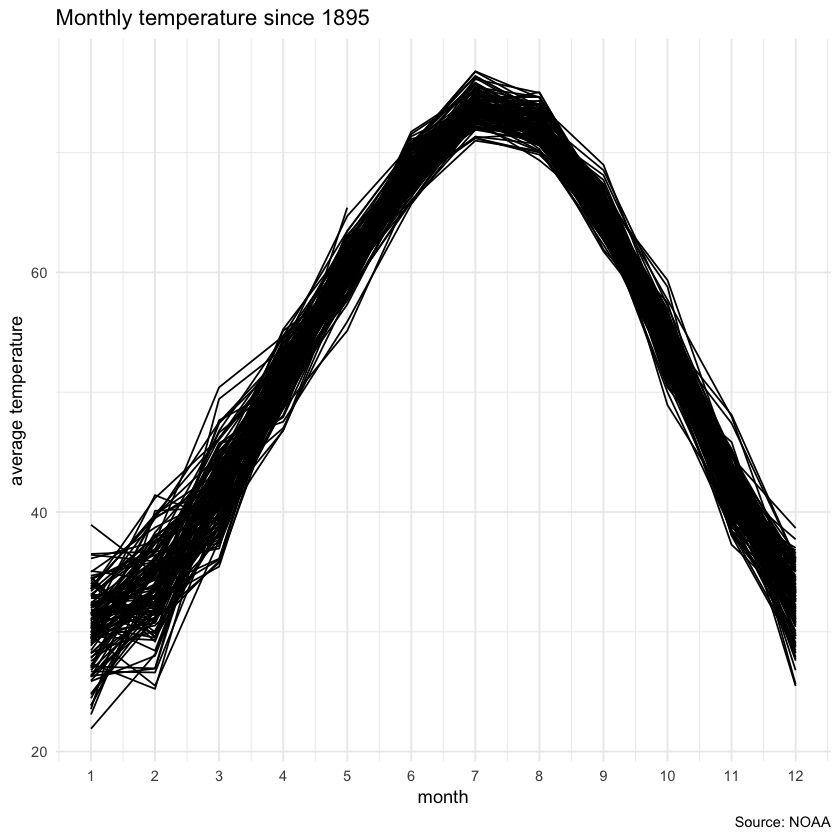

In [18]:
library(ggplot2)

ggplot(temps, aes(x=month, y=Value, group=Year)) +
  geom_line() +
  scale_x_continuous(breaks=seq(1,12,1), limits=c(1,12)) +
  theme_minimal() +
  labs(y="average temperature", title="Monthly temperature since 1895", caption="Source: NOAA")

label_key: Year


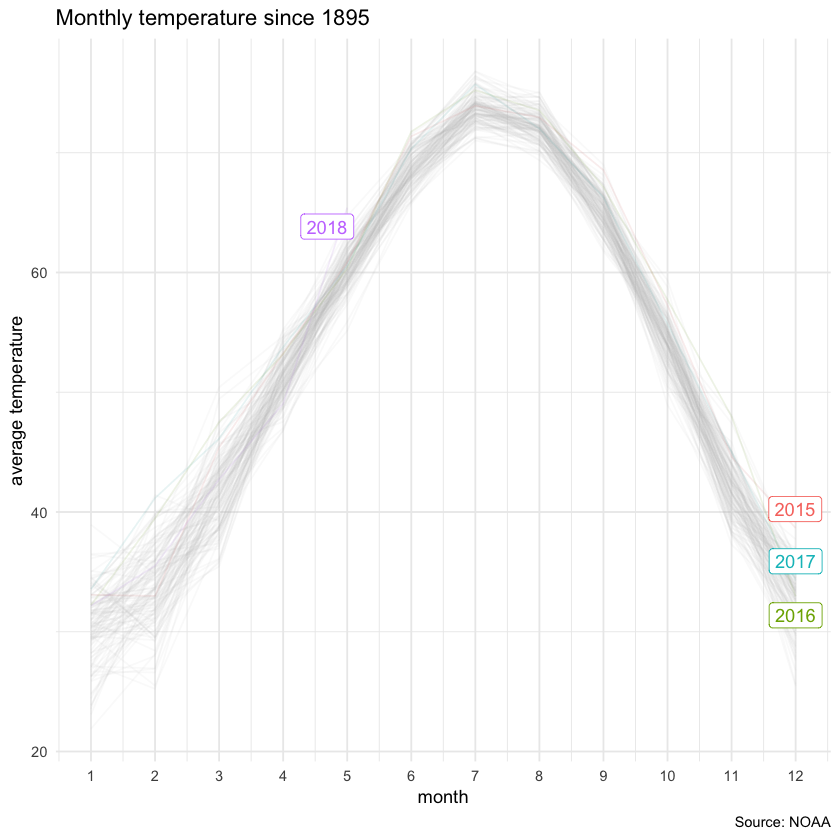

In [20]:
library(gghighlight)

# adding some alpha to the line so there's some transparency
ggplot(temps, aes(x=month, y=Value, color=Year)) +
  geom_line(alpha=.08) +
  scale_x_continuous(breaks=seq(1,12,1), limits=c(1,12)) +
  theme_minimal() +
  labs(y="average temperature", title="Monthly temperature since 1895", caption="Source: NOAA") +
  # NEW CODE BELOW
  gghighlight(max(as.numeric(Year)), max_highlight = 4L)

In [ ]:
# to save as png
dev.copy(png,"myfile.png",width=8,height=6,units="in",res=100)
dev.off()

In [22]:
ages <- read_csv("ages.csv")

Parsed with column specification:
cols(
  Movie = col_character(),
  Genre = col_character(),
  actor = col_character(),
  actor_age = col_integer(),
  actress = col_character(),
  actress_age = col_integer(),
  budget = col_double()
)


In [30]:
head(ages,8)

Movie,Genre,actor,actor_age,actress,actress_age,budget
Mo' Better Blues,drama,Denzel Washington,35,Joie Lee,28,10
Malcolm X,drama,Denzel Washington,37,Angela Bassett,34,34
The Preacher's Wife,drama,Denzel Washington,41,Whitney Houston,33,40
He Got Game,drama,Denzel Washington,43,Milla Jovovich,22,25
Remember the Titans,drama,Denzel Washington,45,Micole Ari Parker,29,30
Training Day,drama,Denzel Washington,46,Eva Mendes,27,45
John Q,drama,Denzel Washington,47,Kimberly Elise,34,36
Out of Time,drama,Denzel Washington,48,Sanaa Lathan,32,50


In [31]:
anom <- read_csv("1880-2018.csv", skip=4)
head(anom)

Parsed with column specification:
cols(
  Year = col_integer(),
  Value = col_double()
)


Year,Value
188001,0.00
188002,-0.13
188003,-0.13
188004,-0.05
188005,-0.07
188006,-0.17


In [32]:
anom$Date <- ymd(paste0(anom$Year, "01"))

# Extracting the year
anom$Year <- year(anom$Date)
  
# Extracting the month
anom$month <- month(anom$Date)
anom$month <- as.numeric(anom$month)
anom$month_label <- month(anom$Date, label=T)

# Turning the year into a factor so it'll chart easier
anom$Year <- as.factor(as.character(anom$Year))

library(forcats)

anom <- anom %>% 
  mutate(Year=fct_rev(factor(Year)))

In [35]:
head(anom,8)

Year,Value,Date,month,month_label
1880,0.00,1880-01-01,1,Jan
1880,-0.13,1880-02-01,2,Feb
1880,-0.13,1880-03-01,3,Mar
1880,-0.05,1880-04-01,4,Apr
1880,-0.07,1880-05-01,5,May
1880,-0.17,1880-06-01,6,Jun
1880,-0.16,1880-07-01,7,Jul
1880,-0.07,1880-08-01,8,Aug


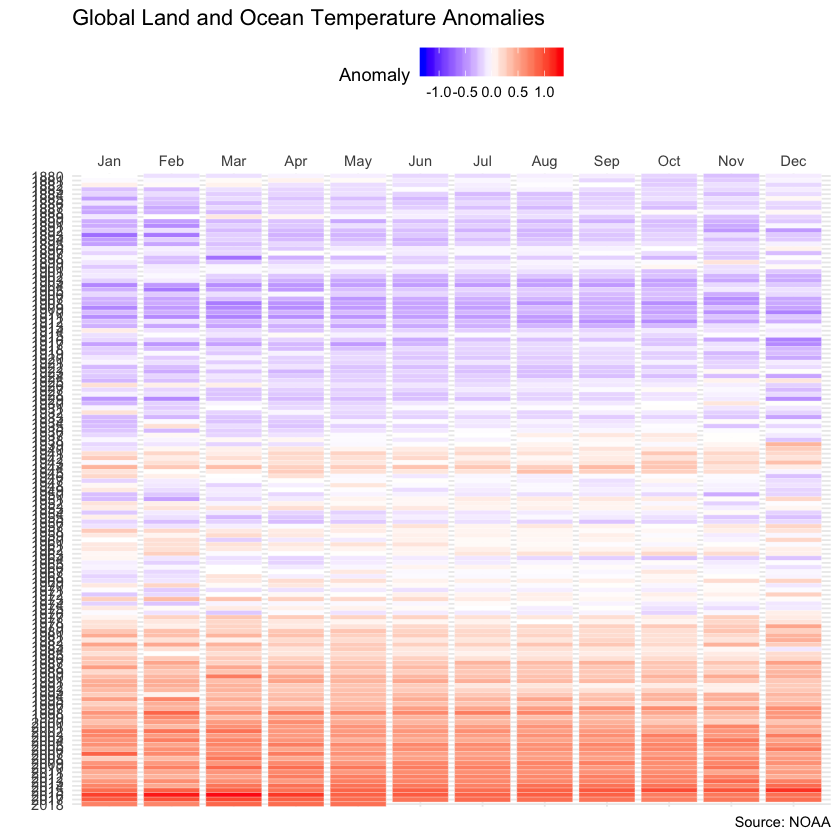

In [33]:
ggplot(anom, aes(y=Year, x=month_label, fill=Value)) +
  geom_tile(color="white", width=.9, height=1.1) +
  theme_minimal() +
  scale_fill_gradient2(midpoint=0, low="blue", high="red", limits=c(-1.3, 1.3)) +
  labs(title="Global Land and Ocean Temperature Anomalies", x="", y="", caption="Source: NOAA", fill="Anomaly") +
  scale_x_discrete(position = "top") +
  theme(legend.position="top")

In [ ]:
#
#dev.copy(png,"myfile.png",width=8,height=6,units="in",res=100)
#dev.off()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



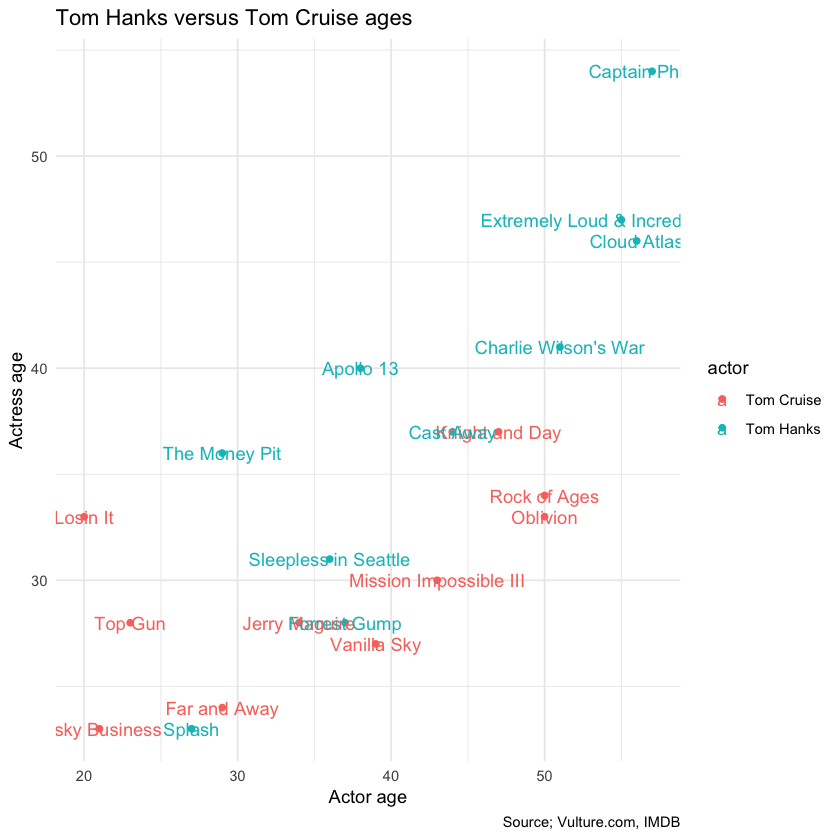

In [23]:
library(dplyr)
library(stringr)
# to select names with "Tom", so we have two' Tom Cruise' & 'Tom Hanks'
toms <- ages %>% 
  filter(str_detect(actor, "Tom"))
# to plot
ggplot(data=toms,
       aes(x=actor_age,
           y=actress_age,
           color=actor,
           label=Movie)) +
      geom_point() +
      theme_minimal() +
      labs(y="Actress age", x="Actor age", title="Tom Hanks versus Tom Cruise ages", caption="Source; Vulture.com, IMDB") +
      geom_text() 